<a href="https://colab.research.google.com/github/Udhay2898/Project/blob/Master/Acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/tamilnadu_accidents.csv')
df.head()


,Date,Location,Type of Vehicle,Cause of Accident,Number of Injuries,Number of Deaths
0,01-01-2020,Salem,Bus,Drunk Driving,4,1
1,02-01-2020,Chennai,Truck,Bad Weather,2,4
2,03-01-2020,Tiruchirappalli,Bus,Road Conditions,4,3
3,04-01-2020,Tiruchirappalli,Motorbike,Bad Weather,6,3
4,05-01-2020,Tiruchirappalli,Bus,Bad Weather,3,3


In [11]:
df.isnull().any()

Date                  False
Location              False
Type of Vehicle       False
Cause of Accident     False
Number of Injuries    False
Number of Deaths      False
dtype: bool

In [12]:
df.duplicated()==1

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                100 non-null    object
 1   Location            100 non-null    object
 2   Type of Vehicle     100 non-null    object
 3   Cause of Accident   100 non-null    object
 4   Number of Injuries  100 non-null    int64 
 5   Number of Deaths    100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [15]:
df.dtypes

Date                  object
Location              object
Type of Vehicle       object
Cause of Accident     object
Number of Injuries     int64
Number of Deaths       int64
dtype: object

In [16]:
df = df.replace('-',0)
df = df.replace('NaN',0)

In [17]:
df.nunique()

Date                  100
Location                5
Type of Vehicle         5
Cause of Accident       5
Number of Injuries     10
Number of Deaths        5
dtype: int64

In [18]:
df.columns

Index(['Date', 'Location', 'Type of Vehicle', 'Cause of Accident',
       'Number of Injuries', 'Number of Deaths'],
      dtype='object')

In [19]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}\n")

Date: ['01-01-2020' '02-01-2020' '03-01-2020' '04-01-2020' '05-01-2020'
 '06-01-2020' '07-01-2020' '08-01-2020' '09-01-2020' '10-01-2020'
 '11-01-2020' '12-01-2020' '13-01-2020' '14-01-2020' '15-01-2020'
 '16-01-2020' '17-01-2020' '18-01-2020' '19-01-2020' '20-01-2020'
 '21-01-2020' '22-01-2020' '23-01-2020' '24-01-2020' '25-01-2020'
 '26-01-2020' '27-01-2020' '28-01-2020' '29-01-2020' '30-01-2020'
 '31-01-2020' '01-02-2020' '02-02-2020' '03-02-2020' '04-02-2020'
 '05-02-2020' '06-02-2020' '07-02-2020' '08-02-2020' '09-02-2020'
 '10-02-2020' '11-02-2020' '12-02-2020' '13-02-2020' '14-02-2020'
 '15-02-2020' '16-02-2020' '17-02-2020' '18-02-2020' '19-02-2020'
 '20-02-2020' '21-02-2020' '22-02-2020' '23-02-2020' '24-02-2020'
 '25-02-2020' '26-02-2020' '27-02-2020' '28-02-2020' '29-02-2020'
 '01-03-2020' '02-03-2020' '03-03-2020' '04-03-2020' '05-03-2020'
 '06-03-2020' '07-03-2020' '08-03-2020' '09-03-2020' '10-03-2020'
 '11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16

In [20]:
df.describe()

,Number of Injuries,Number of Deaths
count,100.000000,100.00000
mean,4.640000,2.14000
std,2.815972,1.34855
min,0.000000,0.00000
25%,2.750000,1.00000
50%,4.500000,2.00000
75%,7.000000,3.00000
max,9.000000,4.00000


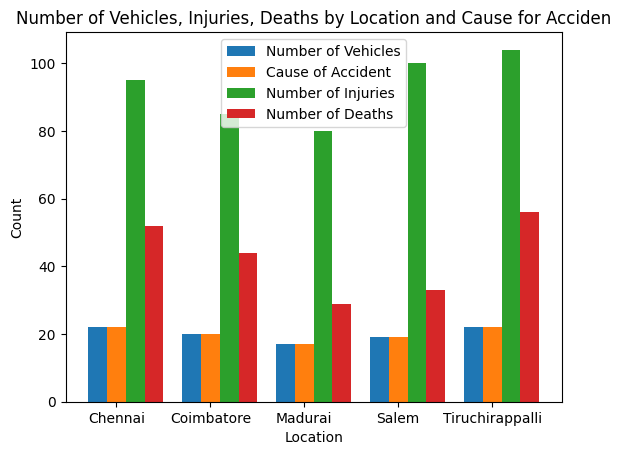

In [21]:
agg_data = df.groupby('Location').agg({
    'Type of Vehicle': 'count',
    'Cause of Accident': 'count',
    'Number of Injuries': 'sum',
    'Number of Deaths': 'sum'
}).rename(columns={'Type of Vehicle': 'Number of Vehicles'}).reset_index()


Locations = agg_data['Location']
values = {
    'Number of Vehicles': agg_data['Number of Vehicles'],
    'Cause of Accident': agg_data['Cause of Accident'],
    'Number of Injuries': agg_data['Number of Injuries'],
    'Number of Deaths': agg_data['Number of Deaths']
}

bar_width = 0.2
index = range(len(Locations))

fig, ax = plt.subplots()

for i, (label, data) in enumerate(values.items()):
    plt.bar([x + i * bar_width for x in index], data, bar_width, label=label)

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Number of Vehicles, Injuries, Deaths by Location and Cause for Acciden')
plt.xticks([x + bar_width for x in index], Locations)
plt.legend()

plt.show()

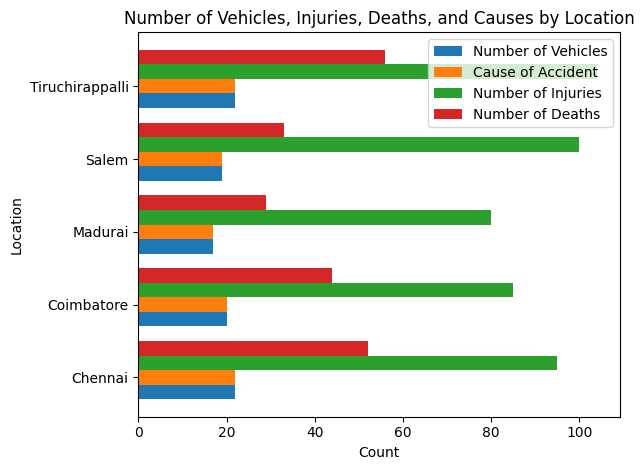

In [22]:
agg_data1 = df.groupby('Location').agg({
    'Type of Vehicle': 'count',
    'Cause of Accident': 'count',
    'Number of Injuries': 'sum',
    'Number of Deaths': 'sum'
}).reset_index()

# Prepare data for plotting
Locations = agg_data['Location']
values = {
    'Number of Vehicles': agg_data1['Type of Vehicle'],
    'Cause of Accident': agg_data1['Cause of Accident'],
    'Number of Injuries': agg_data1['Number of Injuries'],
    'Number of Deaths': agg_data1['Number of Deaths']
}

bar_height = 0.2
index = range(len(Locations))

fig, ax = plt.subplots()

# Plot each set of bars in separate subplots
for i, (label, data) in enumerate(values.items()):
    plt.barh([y + i * bar_height for y in index], data, bar_height, label=label)

plt.ylabel('Location')
plt.xlabel('Count')
plt.title('Number of Vehicles, Injuries, Deaths, and Causes by Location')
plt.yticks([y + bar_height for y in index], Locations)
plt.legend()

plt.tight_layout()
plt.show()

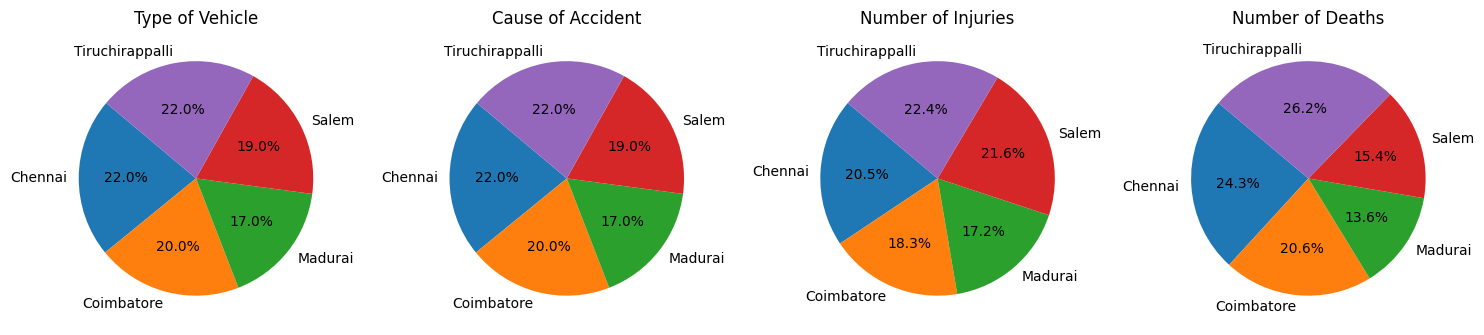

In [23]:
agg_data = df.groupby('Location').agg({
    'Type of Vehicle': 'count',
    'Cause of Accident': 'count',
    'Number of Injuries': 'sum',
    'Number of Deaths': 'sum'
}).reset_index()

# Prepare data for plotting
labels = agg_data['Location']
sizes = agg_data['Type of Vehicle']
explode = (0.1, 0, 0, 0)  # explode 1st slice (Location1)

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot pie charts for each metric
metrics = ['Type of Vehicle', 'Cause of Accident', 'Number of Injuries', 'Number of Deaths']
for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.pie(agg_data[metric], labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{metric}')

plt.tight_layout()
plt.show()

In [24]:
df.head(1)

,Date,Location,Type of Vehicle,Cause of Accident,Number of Injuries,Number of Deaths
0,01-01-2020,Salem,Bus,Drunk Driving,4,1


In [105]:
agg_data = df.groupby("Location").agg({'Type of Vehicle' : 'count',
                                       'Cause of Accident' : 'count',
                                       'Number of Injuries' : 'sum',
                                       'Number of Deaths' : 'sum'}).reset_index()

In [104]:
Location = agg_data['Location']

values = {'No of Vehicles' : agg_data['Type of Vehicle'],
          'Count of Causes' : agg_data['Cause of Accident'],
          'Number of Injuries' : agg_data['Number of Injuries'],
          'Number of Deaths' : agg_data['Number of Deaths']}

bar_width = 0.2
index = range(len(Locations))

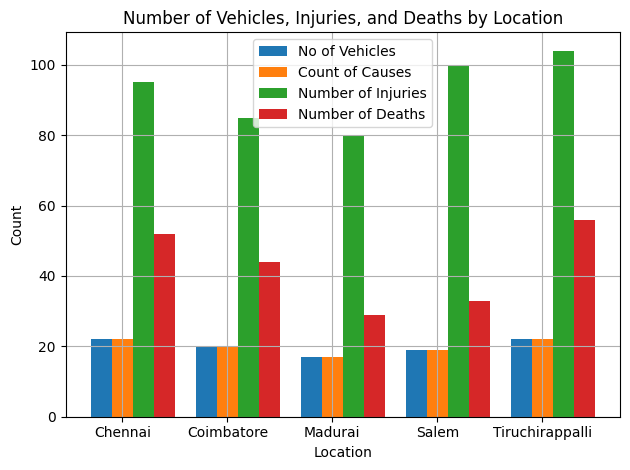

In [116]:
fig, ax = plt.subplots()

for i, (label, data) in enumerate(values.items()):
    plt.bar([x + i * bar_width for x in index], data, bar_width, label=label)

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Number of Vehicles, Injuries, and Deaths by Location')
plt.xticks([x + bar_width for x in index], Locations, rotation=0)
plt.legend()

plt.grid(True)

plt.tight_layout()
plt.show()


In [98]:
g = df.groupby('Location')
Location_df = {}

In [99]:
Location_df = {}
for location, group in g:
    agg_df = group.groupby('Type of Vehicle').agg({
        'Number of Injuries': 'sum',
        'Number of Deaths': 'sum'
    }).reset_index()
    Location_df[location] = agg_df


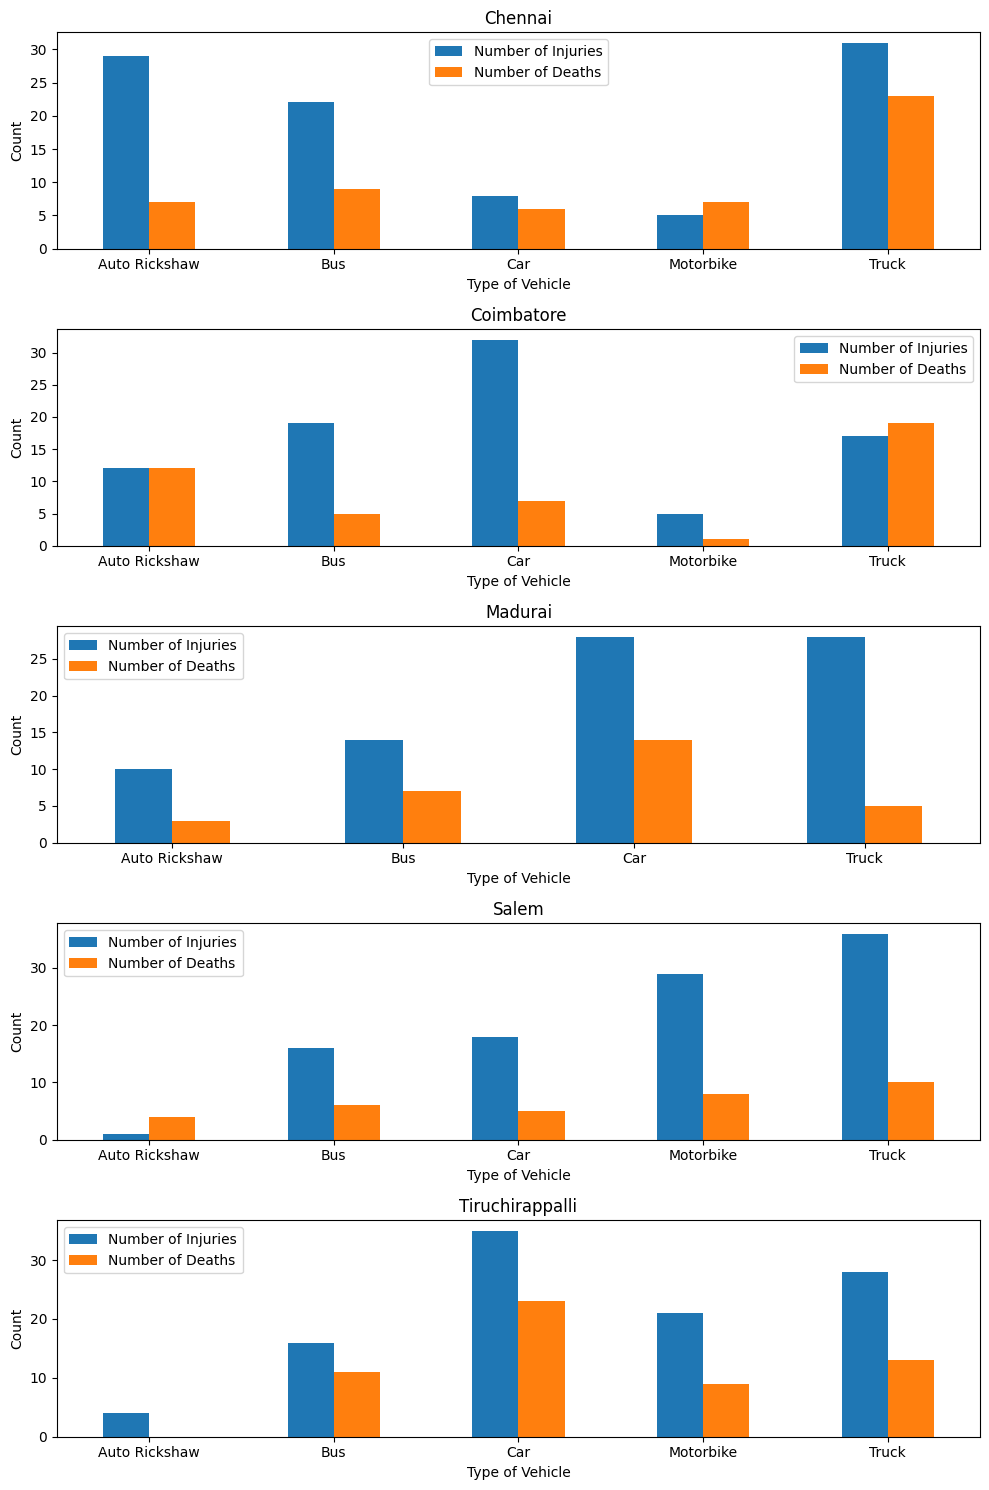

In [119]:
bar_width = 0.2
fig, axes = plt.subplots(nrows=len(Location_df), ncols=1, figsize=(10, 15))

for ax, (location, location_df) in zip(axes, Location_df.items()):
    location_df.plot(kind='bar', x='Type of Vehicle', y=['Number of Injuries', 'Number of Deaths'], ax=ax, title=location)
    ax.set_xlabel('Type of Vehicle')
    ax.set_ylabel('Count')
    ax.legend(['Number of Injuries', 'Number of Deaths'])
    ax.set_xticklabels(location_df['Type of Vehicle'], rotation=0)

plt.tight_layout()
plt.show()

In [120]:
g1 = df.groupby('Location')
Location_df1 = {}


In [121]:
for Location, group in g1:
    agg_df = group.groupby('Cause of Accident').agg({
        'Number of Injuries': 'sum',
        'Number of Deaths': 'sum'
    }).reset_index()
    Location_df1[Location] = agg_df

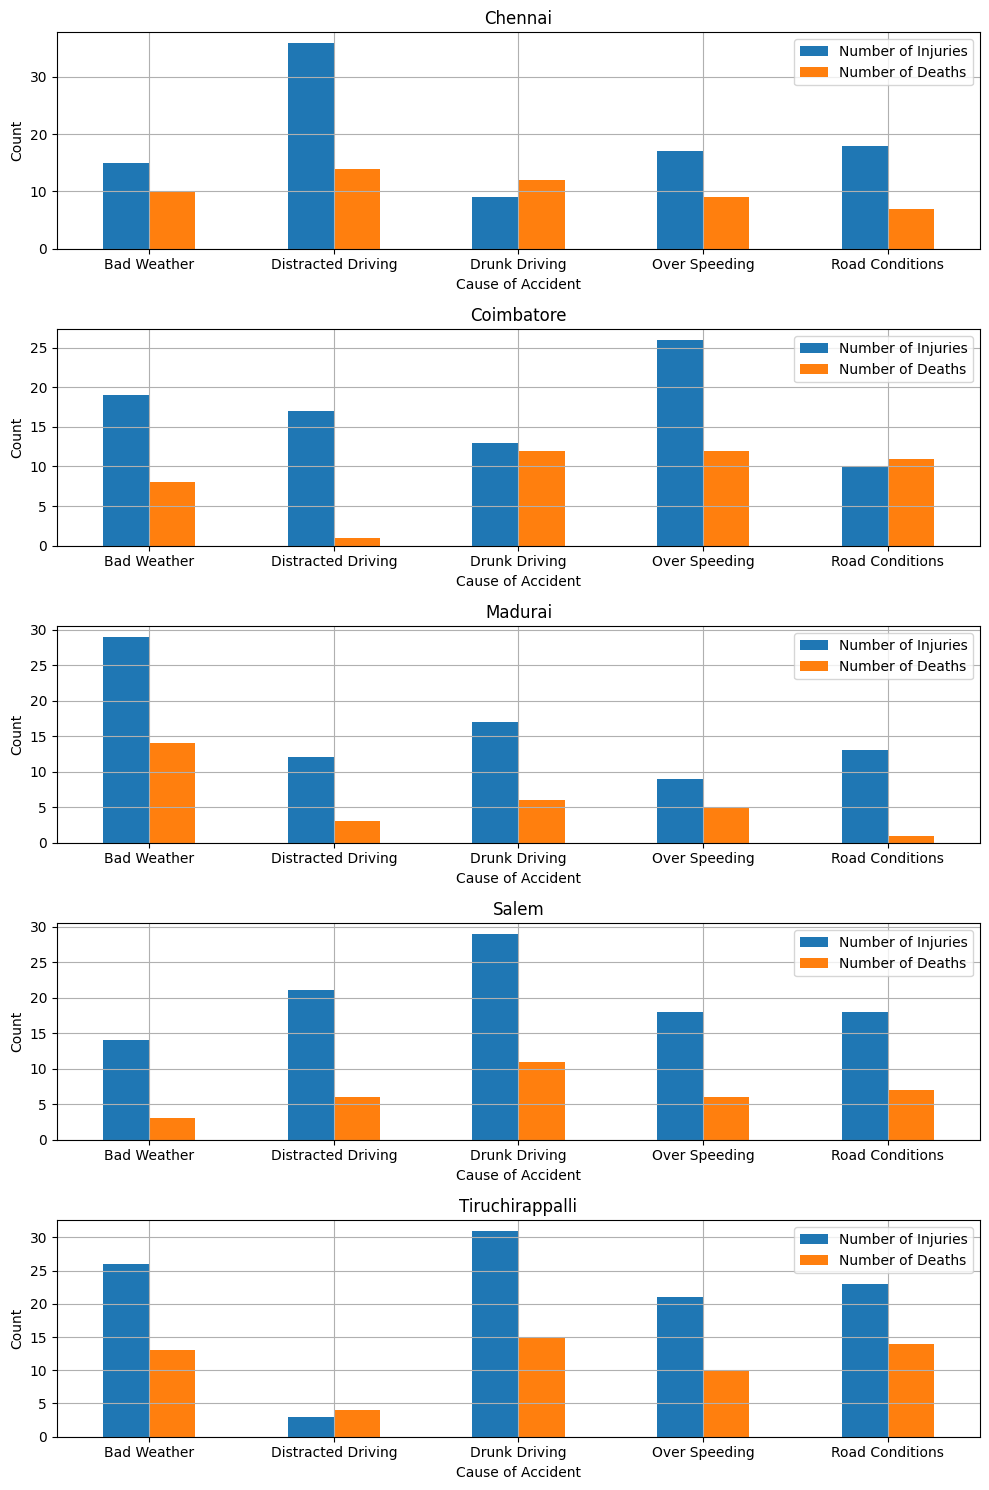

In [122]:
fig, axes = plt.subplots(nrows=len(Location_df1), ncols=1, figsize=(10, 15))

for ax, (Location, Location_df1) in zip(axes, Location_df1.items()):
    Location_df1.plot(kind='bar', x='Cause of Accident', y=['Number of Injuries', 'Number of Deaths'], ax=ax, title=Location)
    ax.set_xlabel('Cause of Accident')
    ax.set_ylabel('Count')
    ax.legend(['Number of Injuries', 'Number of Deaths'])
    ax.set_xticklabels(Location_df1['Cause of Accident'], rotation=0)

    ax.grid(True)

plt.tight_layout()
plt.show()